In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

dir='C:\\Users\\sujee\\OneDrive\\Desktop\\Jupyter_notebook\\PetImages'
categories=['cats','dogs']
data=[]
for x in categories:
    path=os.path.join(dir,x)
    label=categories.index(x)
    
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        pet_img=cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(pet_img,(50,50))
            image=np.array(pet_img).flatten()
    
            data.append([image,label])
        except Exception as e:
            pass


print(len(data))


2000


In [3]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [4]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

In [5]:
data

[[array([127, 117, 112, ...,  61,  65,  65], dtype=uint8), 0],
 [array([119, 120, 126, ...,  60,  59,  56], dtype=uint8), 0],
 [array([ 50,  60,  76, ..., 132, 127, 153], dtype=uint8), 0],
 [array([ 96, 108, 121, ..., 150, 147, 134], dtype=uint8), 0],
 [array([224, 218, 215, ..., 249, 251, 252], dtype=uint8), 0],
 [array([200, 204, 206, ...,  51,  36,  60], dtype=uint8), 0],
 [array([209, 227, 230, ..., 183, 183, 179], dtype=uint8), 0],
 [array([39, 22, 17, ...,  9, 21, 15], dtype=uint8), 0],
 [array([19, 20, 22, ..., 88, 85, 74], dtype=uint8), 0],
 [array([ 78,  69,  73, ..., 191, 203, 196], dtype=uint8), 0],
 [array([121, 223, 222, ..., 108, 104,  72], dtype=uint8), 0],
 [array([113, 137, 140, ..., 166, 160, 153], dtype=uint8), 0],
 [array([ 84,  96,  98, ..., 111, 107,  97], dtype=uint8), 0],
 [array([165, 182, 177, ..., 207, 206, 205], dtype=uint8), 0],
 [array([  2,   5,  99, ..., 140, 123,  49], dtype=uint8), 0],
 [array([ 99, 102, 106, ..., 149, 141, 141], dtype=uint8), 0],
 [ar

In [6]:
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)

x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.6)
model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(x_train,y_train)

pick=open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

#prediction=model.predict(x_test)
#accuracy=model.score(x_test,y_test)

#print('Accuracy:',accuracy)
#print('Prediction is:',categories[predictions[0]])

#mypet=x_test[2].reshape(50,50)
#plt.imshow(mypet,cmap='gray')

In [7]:
pick=open('model.sav','rb')
model=pickle.load(pick)
pick.close()

Accuracy: 0.5566666666666666
Prediction is: dogs


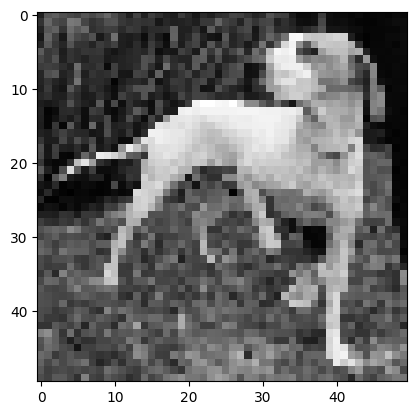

In [10]:
prediction=model.predict(x_test)
accuracy=model.score(x_test,y_test)

print('Accuracy:',accuracy)
print('Prediction is:',categories[prediction[0]])

mypet=x_test[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')